# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [20]:
male_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [23]:
data = pd.read_csv('weight-height.csv')
male_df =  data[data["Gender"] == 'Male']
female_df =  data[data["Gender"] == "Female"]

print("Male Height mean: {}".format(male_df.Height.mean()))
print("Male Height sd: {}".format(male_df.Height.std()))
print("Male Weight mean: {}".format(male_df.Weight.mean()))
print("Male Weight sd: {}".format(male_df.Weight.std()))
print("Female Height mean: {}".format(female_df.Height.mean()))
print("Female Height sd: {}".format(female_df.Height.std()))
print("Female Weight mean: {}".format(female_df.Weight.mean()))
print("Female Weight sd: {}".format(female_df.Weight.std()))

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight sd: 19.7811545167638
Female Height mean: 63.70877360342507
Female Height sd: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight sd: 19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

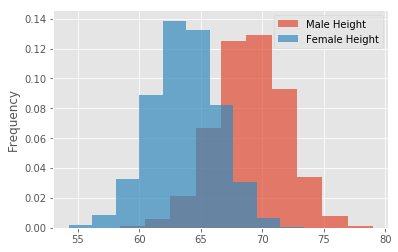

In [32]:
# Your code here

binsize = 10
male_df.Height.plot.hist(bins = binsize, density = True, alpha = 0.7, label = 'Male Height');
female_df.Height.plot.hist(bins = binsize, density = True, alpha = 0.7, label = 'Female Height');
plt.legend()
plt.show()

In [33]:
# Record your observations - are these inline with your personal observations?

# Males tend to be taller than females.

# The tallest males are taller than the tallest females, and
# the shortest males are taller than the shortest females.

# There are females who are taller than many males.
# Height data for both genders are of a normal distribution.

# This is unsurprising. About what I would expect.

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

In [34]:
n.size

NameError: name 'n' is not defined

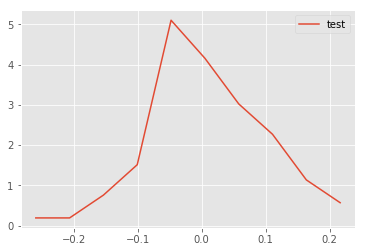

In [36]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    # Initialize numpy arrays with zeros to store interpolated values
    # Here n represents the values of the histogram and bins are the bin positions along the x-axis.
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    # Interpolate through histogram bins
    # Identify middle point between two neighboring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k] + bins[k+1])
        pdfy[k] = n[k]
        
    # plot the calculated curve
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()
plt.show()

## Add overlapping density plots to the histograms plotted earlier

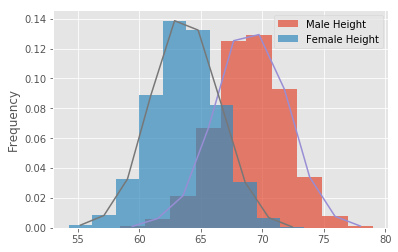

In [37]:
male_df.Height.plot.hist(bins = binsize, density = True, alpha = 0.7, label = 'Male Height');
female_df.Height.plot.hist(bins = binsize, density = True, alpha = 0.7, label = 'Female Height');
plt.legend()
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)
plt.show()

## Repeat the above exercise for male and female weights

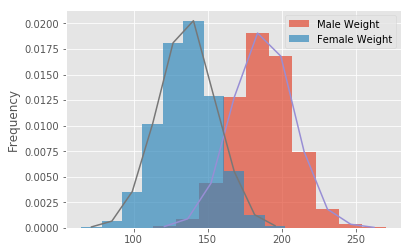

In [38]:
male_df.Weight.plot.hist(bins = binsize, density = True, alpha = 0.7, label = 'Male Weight');
female_df.Weight.plot.hist(bins = binsize, density = True, alpha = 0.7, label = 'Female Weight');
plt.legend()
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.show()

## Write your observations in the cell below

In [39]:
# Record your observations - are these inline with your personal observations?

# Males tend to be heavier than females
# Everything in the weight plot is similar to the height plot
# Most females are around 140 pounds, whereas most males are around 180 pounds.

# What is the takeaway when comparing male and female heights and weights?

# Height and weight are correlated for both males and females
# Males and females are seperated by weight more than they are by height.

## Repeat the above experiments in seaborn and compare with your results

/Users/timsennett/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


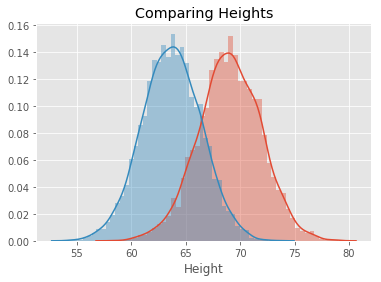

In [41]:
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')
plt.show()

/Users/timsennett/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


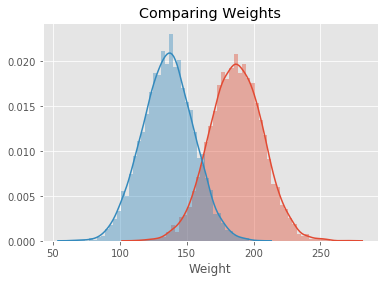

In [42]:
import seaborn as sns
sns.distplot(male_df.Weight)
sns.distplot(female_df.Weight)
plt.title('Comparing Weights')
plt.show()

In [43]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

# There are more bins in these seaborn charts,
# resulting in curves that more closely align to their
# associated histograms.

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.